In [1]:
import json 
import networkx as nx
  

from conjecture.consolidated_functions import *
from conjecture.all_valid_orderings import *
from conjecture.optimization_functions import *
from iterative_heuristic.modified_etf import Mod_ETF
from iterative_heuristic.approximate_speeds import *
from makespan_energy.construct_graph_util import *
from makespan_energy.visualization_util import *
import networkx as nx
import numpy as np
import math
import plotly.express as px
import pandas as pd 

In [2]:
# Construct DAGs

file_list = ['1000genome-chameleon-2ch-100k-001.json',
'1000genome-chameleon-2ch-250k-001.json',
'1000genome-chameleon-4ch-100k-001.json',
'1000genome-chameleon-4ch-250k-001.json',
'1000genome-chameleon-6ch-100k-001.json',
'1000genome-chameleon-6ch-250k-001.json',
'1000genome-chameleon-8ch-100k-001.json',
'1000genome-chameleon-8ch-250k-001.json',
'1000genome-chameleon-10ch-100k-001.json',
'1000genome-chameleon-10ch-250k-001.json',
'1000genome-chameleon-12ch-100k-001.json',
'1000genome-chameleon-12ch-250k-001.json',
'1000genome-chameleon-14ch-100k-001.json',
'1000genome-chameleon-14ch-250k-001.json',
'1000genome-chameleon-16ch-100k-001.json',
'1000genome-chameleon-16ch-250k-001.json',
'1000genome-chameleon-18ch-100k-001.json',
'1000genome-chameleon-18ch-250k-001.json',
'1000genome-chameleon-20ch-100k-001.json',
'1000genome-chameleon-20ch-250k-001.json',
'1000genome-chameleon-22ch-100k-001.json',
'1000genome-chameleon-22ch-250k-001.json']
    
G_list = []

for file in file_list:
    
    # Opening JSON file 
    f = open('pegasus-traces-master/1000genome/chameleon-cloud/' + file) 

    # returns JSON object as  
    # a dictionary 
    data = json.load(f) 

    taskname_to_id = {}
    id_count = 0

    G = nx.DiGraph()

    for task in data['workflow']['jobs']:

        child_id = id_count
        id_count += 1
        taskname_to_id[task['name']] = child_id

        if not G.has_node(child_id):
                G.add_node(child_id)

        for parent in task['parents']:
            if parent in taskname_to_id:

                parent_id = taskname_to_id[parent]

            else:

                parent_id = id_count
                id_count += 1
                taskname_to_id[parent] = parent_id


            if not G.has_edge(parent_id, child_id):
                    G.add_edge(parent_id, child_id)
    print(len(G.nodes))

    
   
    G_list.append(G)
    
    # Closing file 
    f.close() 

52
82
104
164
156
246
208
328
260
410
312
492
364
574
416
656
468
738
520
820
572
902


In [3]:
G_list[0]

In [4]:
mrt = True
tie_breaking_rule = 2
plot = False

x = []
y = []
lb_ratio = []
ub_ratio = []
heu_ratio = []
y_optimal = []
y_lb = []
bad_one = 0
box_whiskers_data = []
num_machines = 3

for G in G_list:
    
    
    ratio = []
    num_tasks = len(G.nodes)
    
    w = [1 for _ in range(num_tasks)]
    s = [1 for _ in range(num_tasks)]

    #d = get_optimal_schedule(mrt, G, num_machines, w, plot, verbose=False)

    test = Mod_ETF(G, w, s, num_machines, tie_breaking_rule, plot=False)

    # Initialize objective function value
    heuristic_opt = test.obj_value

    # Get pseudosize, convert to speed
    psize, group_interval = approx_psize_homogeneous(G, test.order, test.h, test.t, verbose=False)
    s_prime = psize_to_speed(psize)

    # Get ordering using modified ETF
    test2 = Mod_ETF(G, w, s_prime, num_machines, tie_breaking_rule, plot=plot)

    # Check if the objective function value has improved
    if heuristic_opt > test2.obj_value:
        heuristic_opt = test2.obj_value
        s = s_prime

    _, _, obj_opt, _ = get_objective_single_ordering(True, G, w, test2.order, plot=plot, compare=False)
    d = get_optimal_schedule(mrt, G, num_machines, w, plot, verbose=False)
    # if solver was successful
    # and d["objective_task_scaling"] != 10000000
    if obj_opt != 10000000 and d["objective_task_scaling"] != 10000000:
        
        x.append(num_tasks)
        y.append(obj_opt)
        heu_ratio.append(heuristic_opt/obj_opt)
        lb_ratio.append(d["objective_task_scaling"]/obj_opt)
        ub = obj_ub_precise = 2 * sum(psize_to_speed(ub_lst_graph(G, test2.order)))
        ub_ratio.append(ub/obj_opt)
 

apm 104.5.118.159_gk_model1 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           57
   Constants    :            0
   Variables    :          991
   Intermediates:            0
   Connections  :          473
   Equations    :          726
   Residuals    :          726
 
 Number of state variables:            991
 Number of total equations: -          782
 Number of slack variables: -          463
 ---------------------------------------
 Degrees of freedom       :           -254
 
 * Warning: DOF <= 0
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

**************************************************************************

apm 104.5.118.159_gk_model3 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           87
   Constants    :            0
   Variables    :         1801
   Intermediates:            0
   Connections  :          743
   Equations    :         1386
   Residuals    :         1386
 
 Number of state variables:           1801
 Number of total equations: -         1472
 Number of slack variables: -          973
 ---------------------------------------
 Degrees of freedom       :           -644
 
 * Warning: DOF <= 0
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

**************************************************************************

apm 104.5.118.159_gk_model5 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          109
   Constants    :            0
   Variables    :         1971
   Intermediates:            0
   Connections  :          941
   Equations    :         1446
   Residuals    :         1446
 
 Number of state variables:           1971
 Number of total equations: -         1554
 Number of slack variables: -          923
 ---------------------------------------
 Degrees of freedom       :           -506
 
 * Warning: DOF <= 0
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

**************************************************************************

apm 104.5.118.159_gk_model7 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          169
   Constants    :            0
   Variables    :         3591
   Intermediates:            0
   Connections  :         1481
   Equations    :         2766
   Residuals    :         2766
 
 Number of state variables:           3591
 Number of total equations: -         2934
 Number of slack variables: -         1943
 ---------------------------------------
 Degrees of freedom       :          -1286
 
 * Warning: DOF <= 0
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

**************************************************************************

apm 104.5.118.159_gk_model9 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          161
   Constants    :            0
   Variables    :         2951
   Intermediates:            0
   Connections  :         1409
   Equations    :         2166
   Residuals    :         2166
 
 Number of state variables:           2951
 Number of total equations: -         2326
 Number of slack variables: -         1383
 ---------------------------------------
 Degrees of freedom       :           -758
 
 * Warning: DOF <= 0
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

**************************************************************************

apm 104.5.118.159_gk_model11 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          251
   Constants    :            0
   Variables    :         5381
   Intermediates:            0
   Connections  :         2219
   Equations    :         4146
   Residuals    :         4146
 
 Number of state variables:           5381
 Number of total equations: -         4396
 Number of slack variables: -         2913
 ---------------------------------------
 Degrees of freedom       :          -1928
 
 * Warning: DOF <= 0
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

*************************************************************************

apm 104.5.118.159_gk_model13 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          213
   Constants    :            0
   Variables    :         3931
   Intermediates:            0
   Connections  :         1877
   Equations    :         2886
   Residuals    :         2886
 
 Number of state variables:           3931
 Number of total equations: -         3098
 Number of slack variables: -         1843
 ---------------------------------------
 Degrees of freedom       :          -1010
 
 * Warning: DOF <= 0
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

*************************************************************************

apm 104.5.118.159_gk_model15 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          333
   Constants    :            0
   Variables    :         7171
   Intermediates:            0
   Connections  :         2957
   Equations    :         5526
   Residuals    :         5526
 
 Number of state variables:           7171
 Number of total equations: -         5858
 Number of slack variables: -         3883
 ---------------------------------------
 Degrees of freedom       :          -2570
 
 * Warning: DOF <= 0
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

*************************************************************************

apm 104.5.118.159_gk_model17 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          265
   Constants    :            0
   Variables    :         4911
   Intermediates:            0
   Connections  :         2345
   Equations    :         3606
   Residuals    :         3606
 
 Number of state variables:           4911
 Number of total equations: -         3870
 Number of slack variables: -         2303
 ---------------------------------------
 Degrees of freedom       :          -1262
 
 * Warning: DOF <= 0
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

*************************************************************************

apm 104.5.118.159_gk_model19 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          415
   Constants    :            0
   Variables    :         8961
   Intermediates:            0
   Connections  :         3695
   Equations    :         6906
   Residuals    :         6906
 
 Number of state variables:           8961
 Number of total equations: -         7320
 Number of slack variables: -         4853
 ---------------------------------------
 Degrees of freedom       :          -3212
 
 * Warning: DOF <= 0
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

*************************************************************************

apm 104.5.118.159_gk_model21 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          317
   Constants    :            0
   Variables    :         5891
   Intermediates:            0
   Connections  :         2813
   Equations    :         4326
   Residuals    :         4326
 
 Number of state variables:           5891
 Number of total equations: -         4642
 Number of slack variables: -         2763
 ---------------------------------------
 Degrees of freedom       :          -1514
 
 * Warning: DOF <= 0
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

*************************************************************************

apm 104.5.118.159_gk_model23 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          497
   Constants    :            0
   Variables    :        10751
   Intermediates:            0
   Connections  :         4433
   Equations    :         8286
   Residuals    :         8286
 
 Number of state variables:          10751
 Number of total equations: -         8782
 Number of slack variables: -         5823
 ---------------------------------------
 Degrees of freedom       :          -3854
 
 * Warning: DOF <= 0
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

*************************************************************************

apm 104.5.118.159_gk_model25 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          369
   Constants    :            0
   Variables    :         6871
   Intermediates:            0
   Connections  :         3281
   Equations    :         5046
   Residuals    :         5046
 
 Number of state variables:           6871
 Number of total equations: -         5414
 Number of slack variables: -         3223
 ---------------------------------------
 Degrees of freedom       :          -1766
 
 * Warning: DOF <= 0
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

*************************************************************************

apm 104.5.118.159_gk_model27 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          579
   Constants    :            0
   Variables    :        12541
   Intermediates:            0
   Connections  :         5171
   Equations    :         9666
   Residuals    :         9666
 
 Number of state variables:          12541
 Number of total equations: -        10244
 Number of slack variables: -         6793
 ---------------------------------------
 Degrees of freedom       :          -4496
 
 * Warning: DOF <= 0
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

*************************************************************************

apm 104.5.118.159_gk_model29 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          421
   Constants    :            0
   Variables    :         7851
   Intermediates:            0
   Connections  :         3749
   Equations    :         5766
   Residuals    :         5766
 
 Number of state variables:           7851
 Number of total equations: -         6186
 Number of slack variables: -         3683
 ---------------------------------------
 Degrees of freedom       :          -2018
 
 * Warning: DOF <= 0
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

*************************************************************************

apm 104.5.118.159_gk_model31 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          661
   Constants    :            0
   Variables    :        14331
   Intermediates:            0
   Connections  :         5909
   Equations    :        11046
   Residuals    :        11046
 
 Number of state variables:          14331
 Number of total equations: -        11706
 Number of slack variables: -         7763
 ---------------------------------------
 Degrees of freedom       :          -5138
 
 * Warning: DOF <= 0
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

*************************************************************************

Results
0 Speed: [1.2649110636] Ending Time: [0.79056940532] Interval: [0.0, 0.79057] Task process time: 0.79057
1 Speed: [1.2649110636] Ending Time: [0.79056940532] Interval: [0.0, 0.79057] Task process time: 0.79057
2 Speed: [1.2649110636] Ending Time: [0.79056940532] Interval: [0.0, 0.79057] Task process time: 0.79057
3 Speed: [1.2649110636] Ending Time: [0.79056940532] Interval: [0.0, 0.79057] Task process time: 0.79057
4 Speed: [1.2649110636] Ending Time: [0.79056940532] Interval: [0.0, 0.79057] Task process time: 0.79057
5 Speed: [1.2649110636] Ending Time: [0.79056940532] Interval: [0.0, 0.79057] Task process time: 0.79057
6 Speed: [1.2649110636] Ending Time: [0.79056940532] Interval: [0.0, 0.79057] Task process time: 0.79057
7 Speed: [1.2649110636] Ending Time: [0.79056940532] Interval: [0.0, 0.79057] Task process time: 0.79057
8 Speed: [1.2649110636] Ending Time: [0.79056940532] Interval: [0.0, 0.79057] Task process time: 0.79057
9 Speed: [1.2649110636] Ending Time: [0.7905694

apm 104.5.118.159_gk_model33 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          473
   Constants    :            0
   Variables    :         8831
   Intermediates:            0
   Connections  :         4217
   Equations    :         6486
   Residuals    :         6486
 
 Number of state variables:           8831
 Number of total equations: -         6958
 Number of slack variables: -         4143
 ---------------------------------------
 Degrees of freedom       :          -2270
 
 * Warning: DOF <= 0
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

*************************************************************************

apm 104.5.118.159_gk_model35 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          743
   Constants    :            0
   Variables    :        16121
   Intermediates:            0
   Connections  :         6647
   Equations    :        12426
   Residuals    :        12426
 
 Number of state variables:          16121
 Number of total equations: -        13168
 Number of slack variables: -         8733
 ---------------------------------------
 Degrees of freedom       :          -5780
 
 * Warning: DOF <= 0
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

*************************************************************************

apm 104.5.118.159_gk_model37 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          525
   Constants    :            0
   Variables    :         9811
   Intermediates:            0
   Connections  :         4685
   Equations    :         7206
   Residuals    :         7206
 
 Number of state variables:           9811
 Number of total equations: -         7730
 Number of slack variables: -         4603
 ---------------------------------------
 Degrees of freedom       :          -2522
 
 * Warning: DOF <= 0
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

*************************************************************************

apm 104.5.118.159_gk_model39 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          825
   Constants    :            0
   Variables    :        17911
   Intermediates:            0
   Connections  :         7385
   Equations    :        13806
   Residuals    :        13806
 
 Number of state variables:          17911
 Number of total equations: -        14630
 Number of slack variables: -         9703
 ---------------------------------------
 Degrees of freedom       :          -6422
 
 * Warning: DOF <= 0
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

*************************************************************************

apm 104.5.118.159_gk_model41 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          577
   Constants    :            0
   Variables    :        10791
   Intermediates:            0
   Connections  :         5153
   Equations    :         7926
   Residuals    :         7926
 
 Number of state variables:          10791
 Number of total equations: -         8502
 Number of slack variables: -         5063
 ---------------------------------------
 Degrees of freedom       :          -2774
 
 * Warning: DOF <= 0
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

*************************************************************************

  65  1.7921190e+04 3.16e+03 7.03e+11   1.3 5.26e+02  10.1 1.00e+00 3.20e-03h  7
  66  1.7921195e+04 3.15e+03 4.83e+11   1.3 5.22e+02   9.6 4.08e-02 3.61e-03h  7
  67  1.7921111e+04 2.95e+03 9.94e+13   1.3 5.22e+02  10.0 1.97e-01 2.16e-01w  1
  68  1.7921541e+04 2.81e+03 9.77e+14   1.3 4.09e+02  10.4 5.83e-03 2.72e-01w  1
  69  1.7921834e+04 2.66e+03 9.29e+14   1.3 2.61e+03  10.9 2.36e-03 5.42e-02w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70  1.7921836e+04 2.66e+03 9.28e+14   0.6 2.49e+03  10.4 5.81e-02 5.67e-04h  1
  71r 1.7921836e+04 2.66e+03 1.00e+03   2.3 0.00e+00   9.9 0.00e+00 3.54e-07R  5
  72r 1.7949752e+04 2.66e+03 1.54e+03  -3.9 1.03e+05    -  1.88e-03 1.80e-03f  1
  73  1.7602938e+04 1.38e+03 4.88e+02   0.6 2.67e+03    -  4.16e-01 4.83e-01f  1
  74  1.7603164e+04 1.34e+03 4.99e+11   0.6 1.47e+02   9.4 5.73e-03 2.15e-01h  1
  75  1.7603164e+04 1.34e+03 4.99e+11   0.6 1.25e+03   8.9 2.67e-01 2.52e-04h  1
  76r 1.7603164e+04 1.34e+03

apm 104.5.118.159_gk_model43 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          907
   Constants    :            0
   Variables    :        19701
   Intermediates:            0
   Connections  :         8123
   Equations    :        15186
   Residuals    :        15186
 
 Number of state variables:          19701
 Number of total equations: -        16092
 Number of slack variables: -        10673
 ---------------------------------------
 Degrees of freedom       :          -7064
 
 * Warning: DOF <= 0
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

*************************************************************************

Results
0 Speed: [1.264911014] Ending Time: [0.7905694363] Interval: [0.0, 0.79057] Task process time: 0.79057
1 Speed: [1.264911014] Ending Time: [0.7905694363] Interval: [0.0, 0.79057] Task process time: 0.79057
2 Speed: [1.264911014] Ending Time: [0.7905694363] Interval: [0.0, 0.79057] Task process time: 0.79057
3 Speed: [1.264911014] Ending Time: [0.7905694363] Interval: [0.0, 0.79057] Task process time: 0.79057
4 Speed: [1.264911014] Ending Time: [0.7905694363] Interval: [0.0, 0.79057] Task process time: 0.79057
5 Speed: [1.264911014] Ending Time: [0.7905694363] Interval: [0.0, 0.79057] Task process time: 0.79057
6 Speed: [1.264911014] Ending Time: [0.7905694363] Interval: [0.0, 0.79057] Task process time: 0.79057
7 Speed: [1.264911014] Ending Time: [0.7905694363] Interval: [0.0, 0.79057] Task process time: 0.79057
8 Speed: [1.264911014] Ending Time: [0.7905694363] Interval: [0.0, 0.79057] Task process time: 0.79057
9 Speed: [1.264911014] Ending Time: [0.7905694363] Interval: [0.0

[300.06145, 1520.32995]


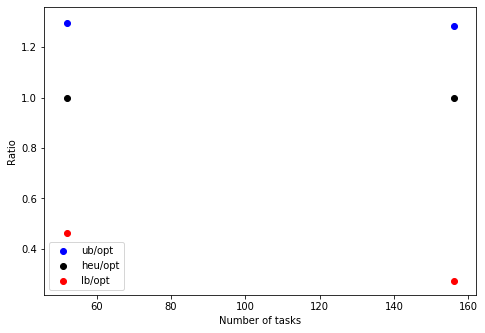

In [5]:
import matplotlib.pyplot as plt
import math

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])



print(y)
#plt.scatter(obj_lb_lst[:,0], obj_lb_lst[:,1], label='lower bound', color="g", linewidths=0.1)


# plt.scatter(x, y, s=5, label='opt/lb', color='b')
plt.scatter(x, ub_ratio, label='ub/opt', color='b')
plt.scatter(x, heu_ratio, label='heu/opt', color='k')
plt.scatter(x, lb_ratio, label='lb/opt', color='r')
# plt.scatter(x, y, label='heuristic/opt', color='b')
plt.xlabel('Number of tasks')
plt.ylabel('Ratio')
plt.legend()
plt.show()